## Load the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


FILENAME = "dataset/train_dataset.csv"

#Prepare train data
df1 = pd.read_csv(FILENAME, sep=",", low_memory=False)

# Converte i valori in numeri, sostituendo quelli non validi con NaN
df1["src_bytes"] = pd.to_numeric(df1["src_bytes"], errors='coerce')

# feature to remove because it identifies the subject of the connection and are not relevant for the analysis
useless_features = ["ts", "src_ip", "dst_ip", "ssl_subject", "ssl_issuer", "dns_query", "http_uri", "http_user_agent"]
for feature in useless_features:
    df1 = df1.drop(feature, axis=1)

df1 = df1.dropna()

In [ ]:
df1

/tmp/ipykernel_2405132/67787522.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


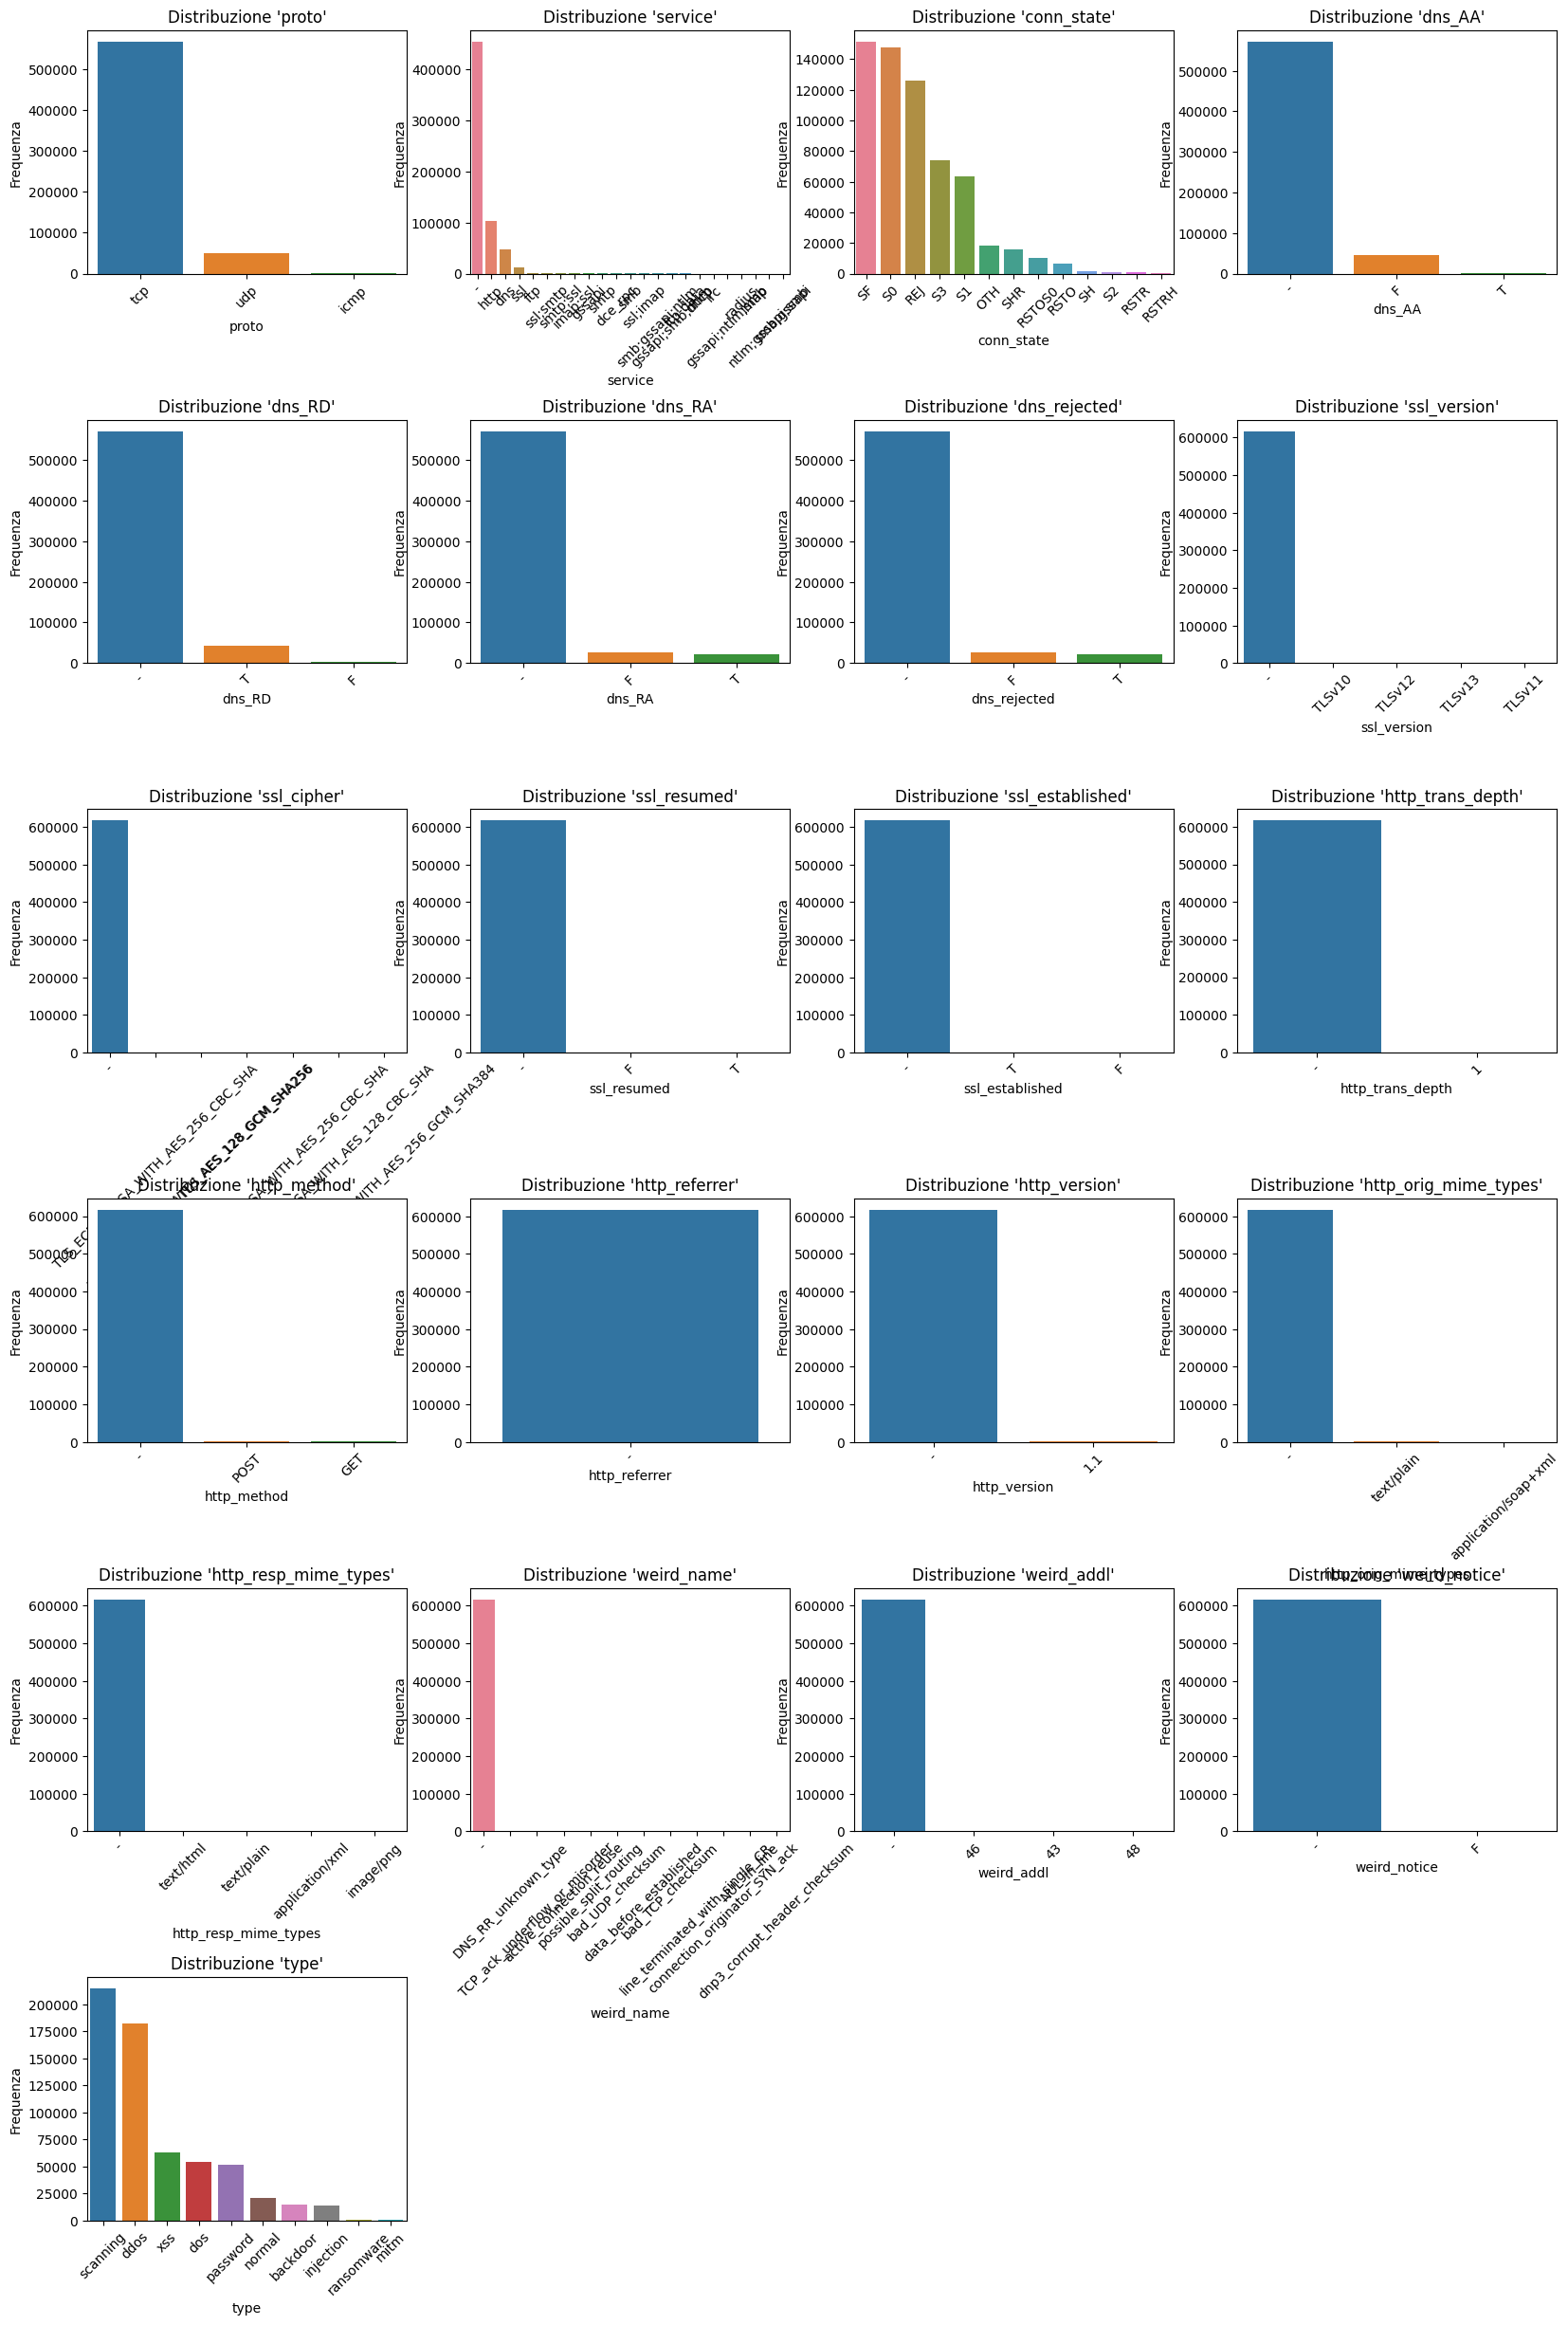

In [2]:
# get categorical columns
categorical_columns = df1.select_dtypes(include=["object"]).columns.tolist()

# Funzione per creare grafici
def plot_categorical_distribution(df, categorical_columns):
    num_columns = len(categorical_columns)
    ncols = 4  # Numero di grafici per riga
    nrows = int(np.ceil(num_columns / ncols))  # Calcola il numero di righe necessarie

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows), gridspec_kw={'hspace': 0.6})
    axes = axes.flatten()  # Rende l'array 2D di assi in un array 1D per iterazione

    for i, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()

        # Grafico a barre
        sns.barplot(
            x=value_counts.index, 
            y=value_counts.values, 
            ax=axes[i], 
            hue=value_counts.index
        )
        axes[i].set_title(f"Distribuzione '{col}'")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequenza")
        axes[i].tick_params(axis='x', rotation=45)

    # Rimuovi eventuali assi vuoti
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Esegui la funzione
plot_categorical_distribution(df1, categorical_columns)


In [ ]:
# get categorical columns
categorical_columns = df1.select_dtypes(include=["object"]).columns.tolist()

# contingency table
for column in categorical_columns:
    contingency_table = pd.crosstab(df1["type"], df1[column],)
    percent_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(percent_table, annot=True)
    plt.title(f"Contingency Table for {column}")
    plt.show()

    percent_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# plot the correlation matrix
# sns.heatmap(df1.corr(), annot=True)

# # plot the distribution of each column
# for column in df1.columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df1[column])
#     plt.title(column)
#     plt.show()


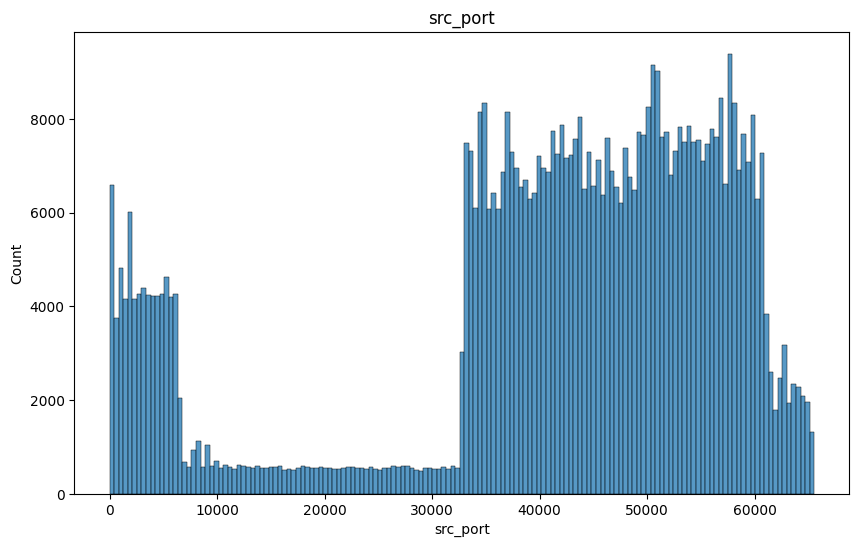

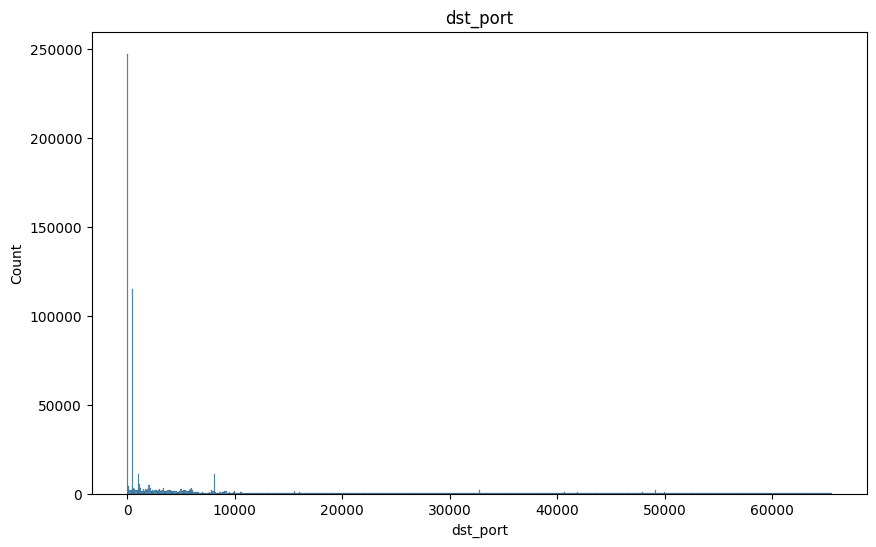

In [ ]:
# plot distrubution of numerical columns
numerical_columns = df1.select_dtypes(include=["int64", "float64"]).columns.tolist()

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[column])
    plt.title(column)
    plt.show()


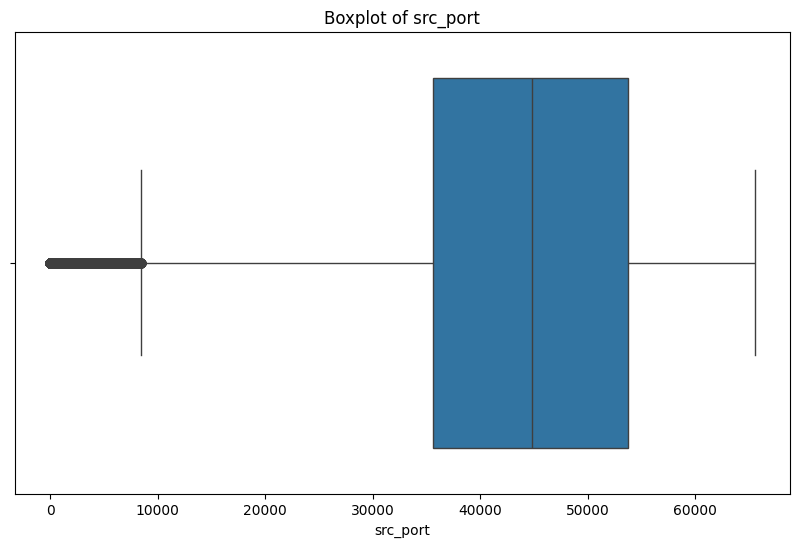

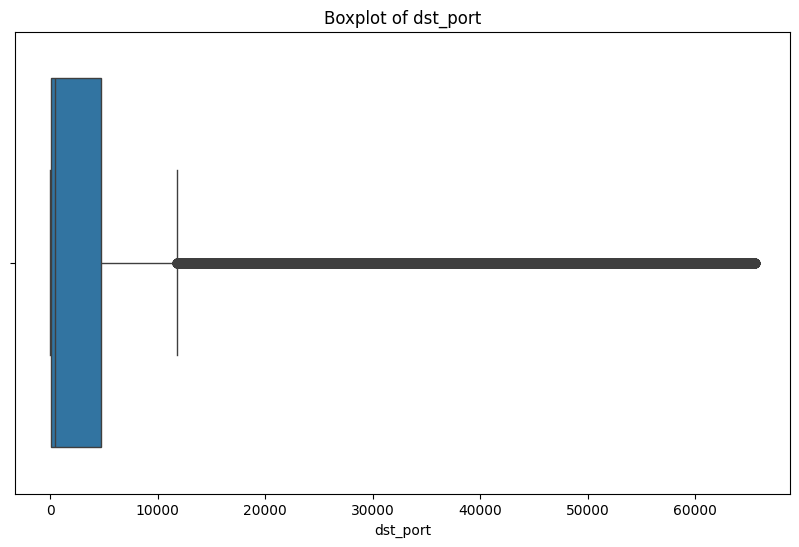

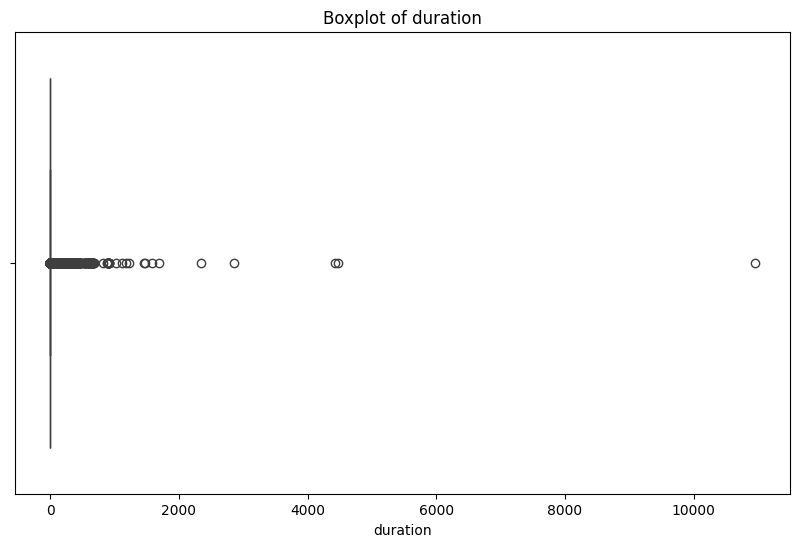

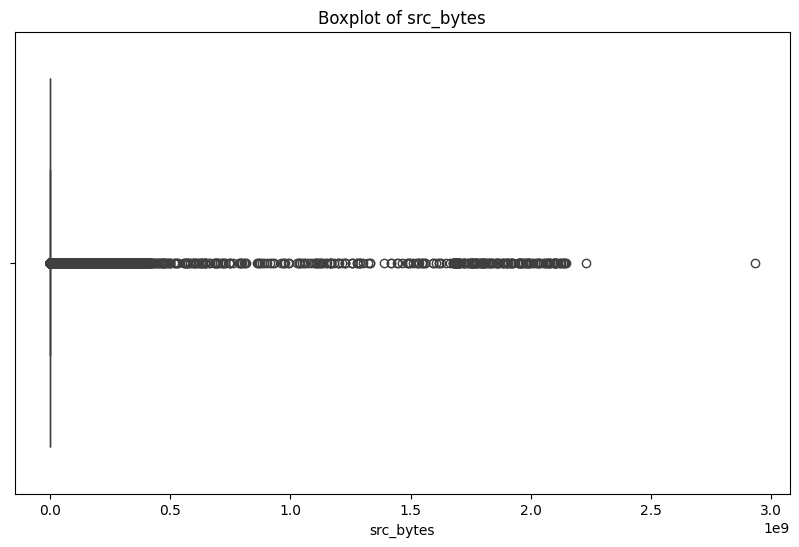

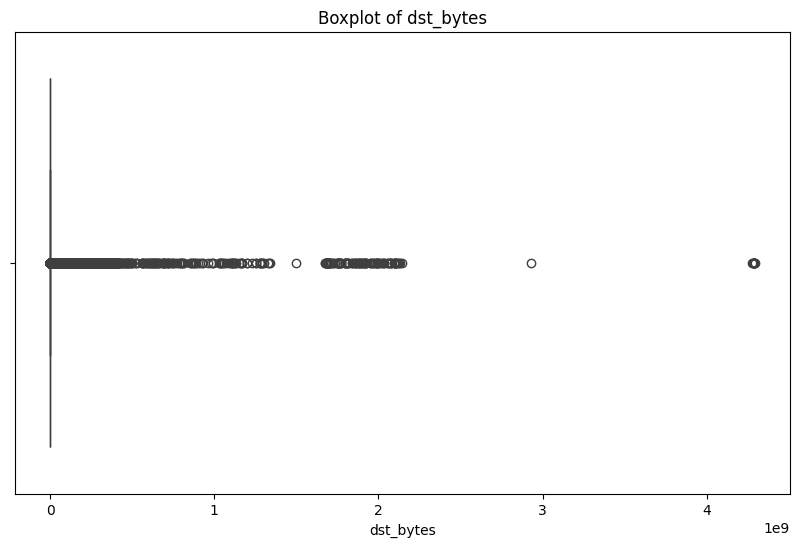

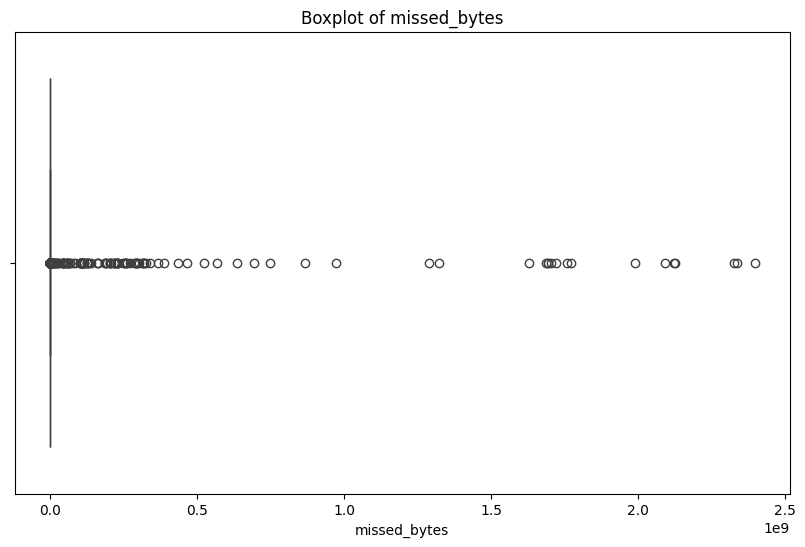

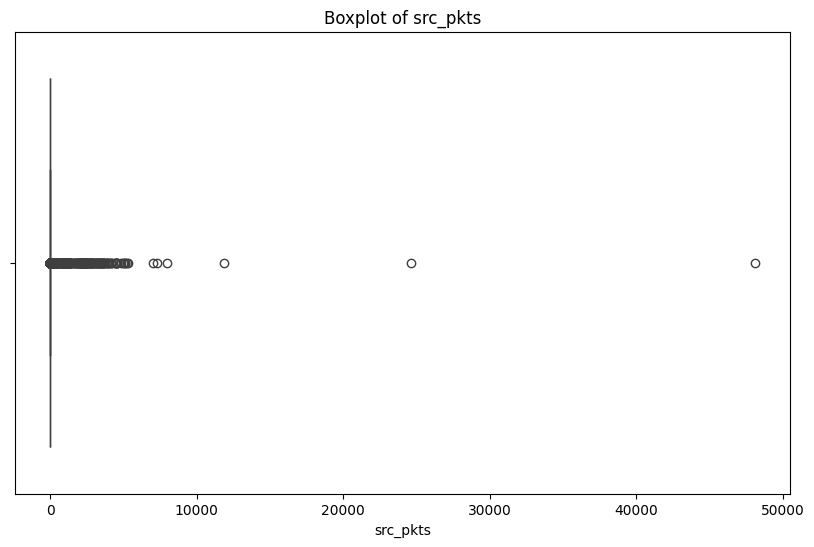

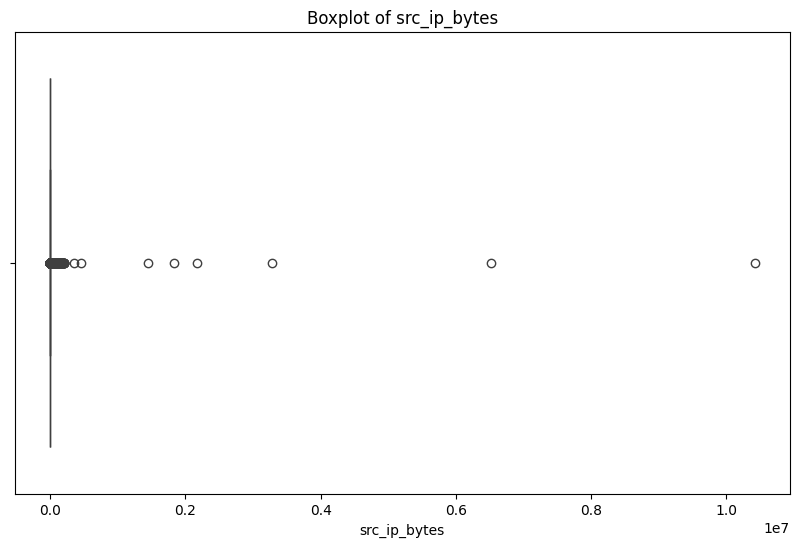

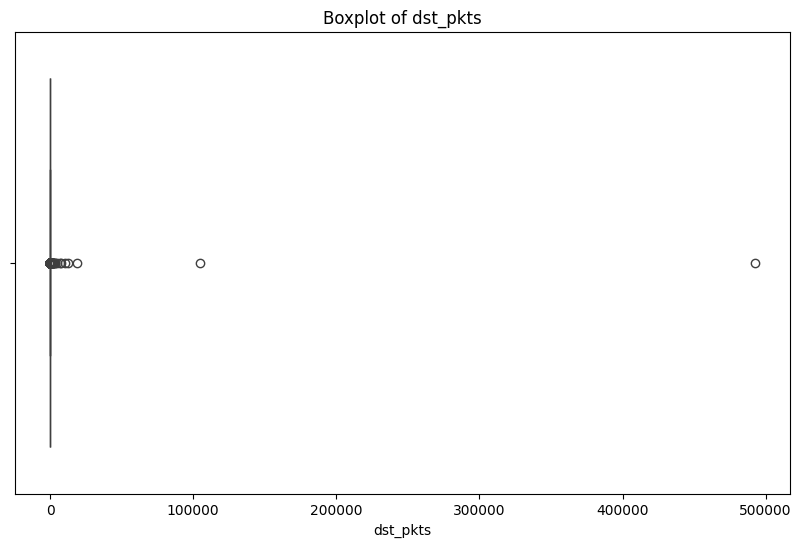

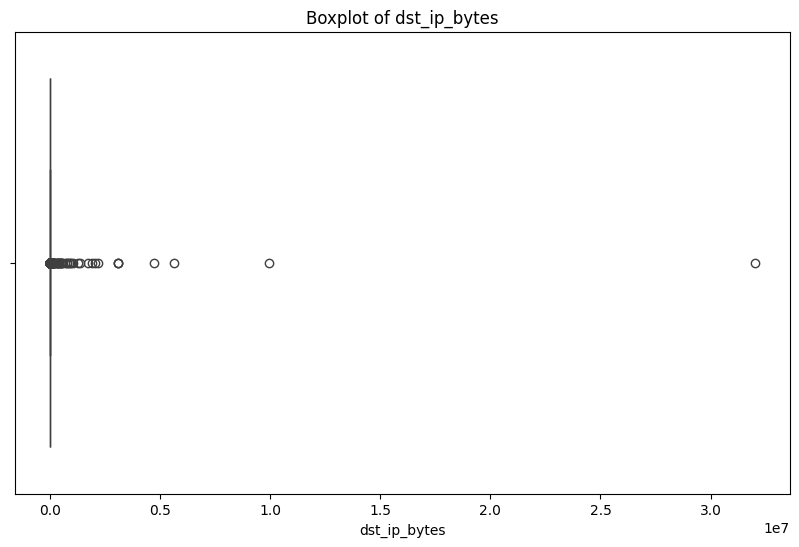

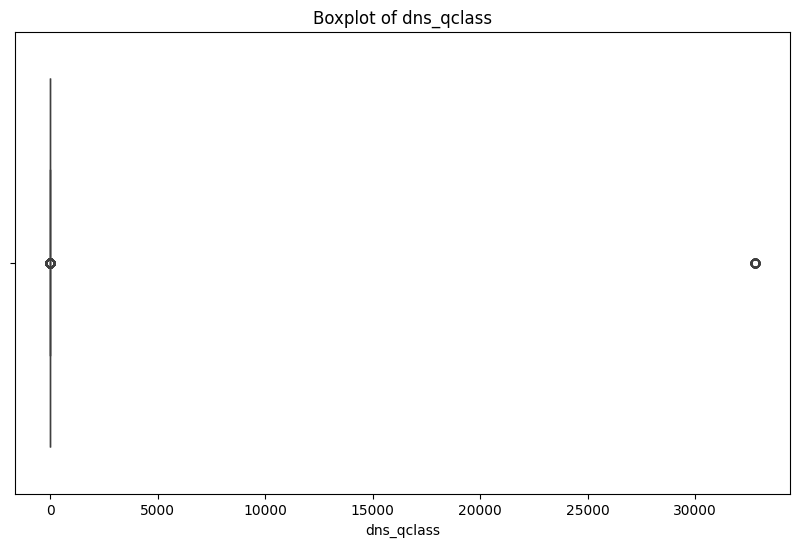

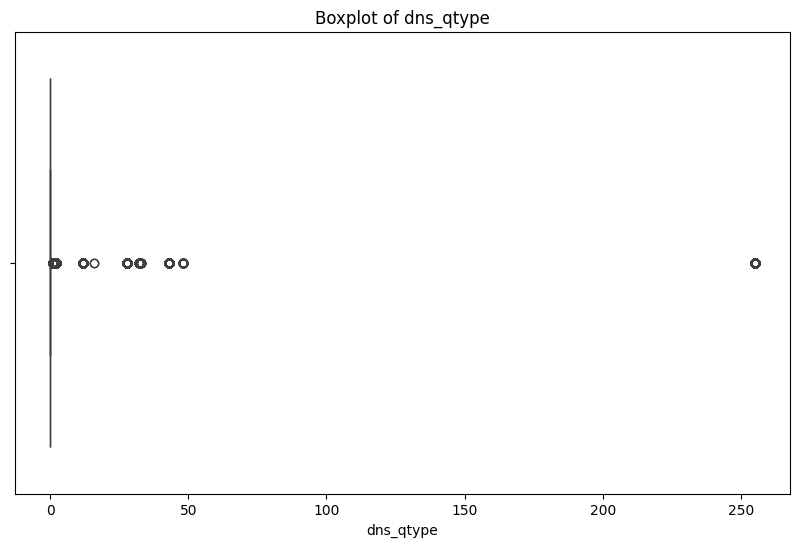

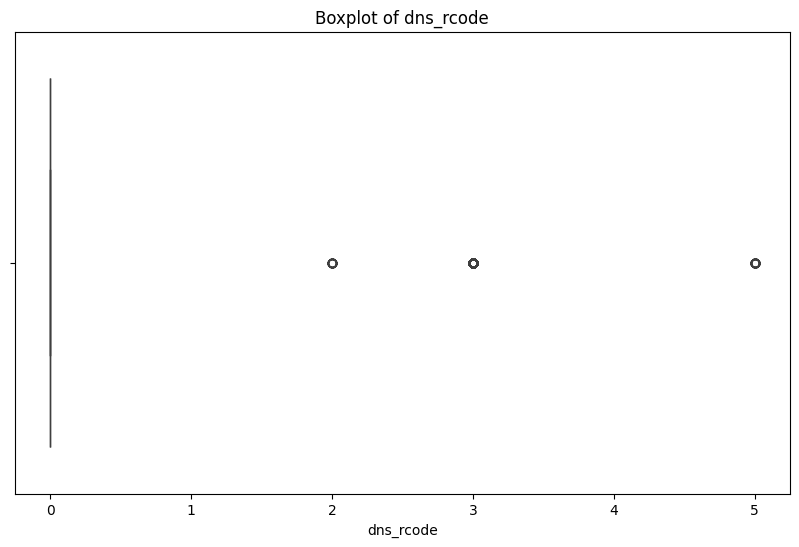

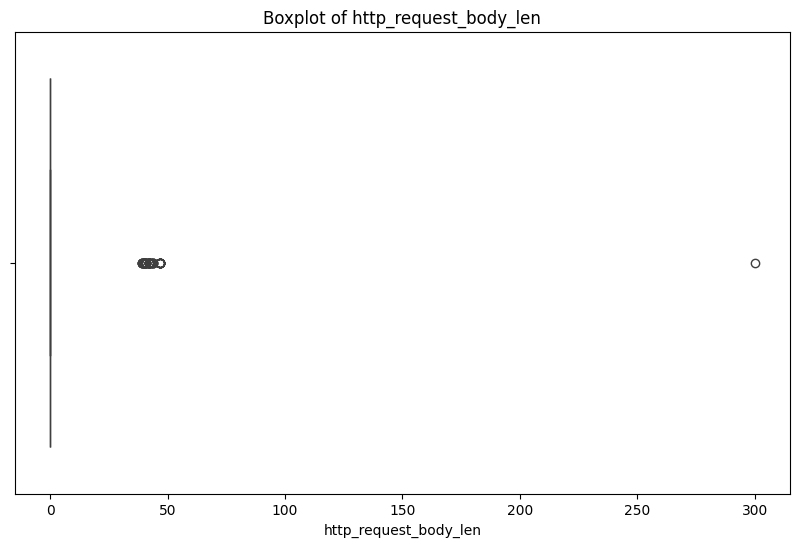

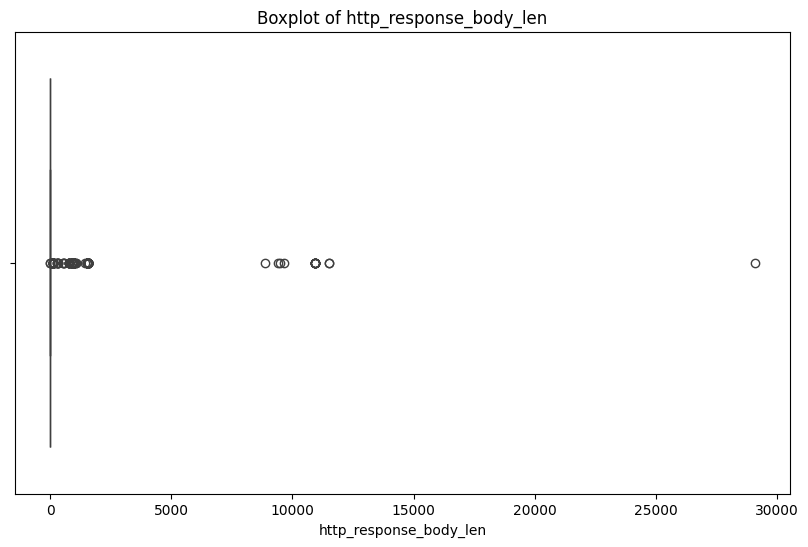

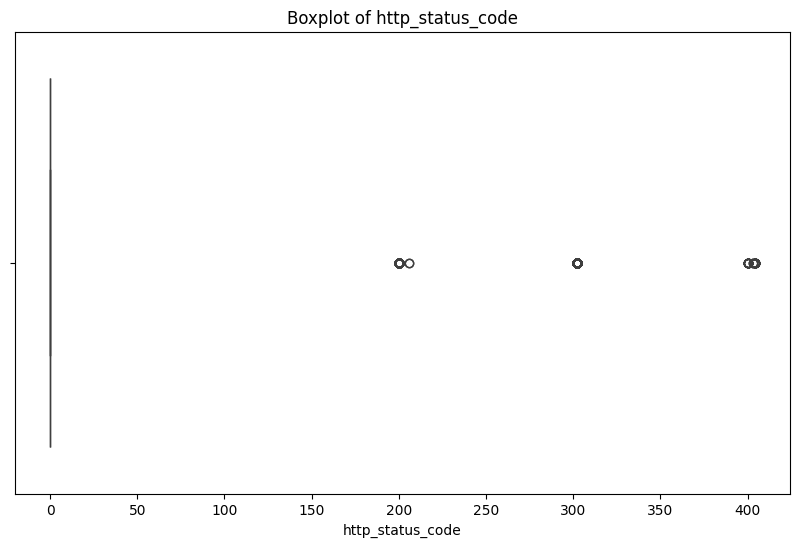

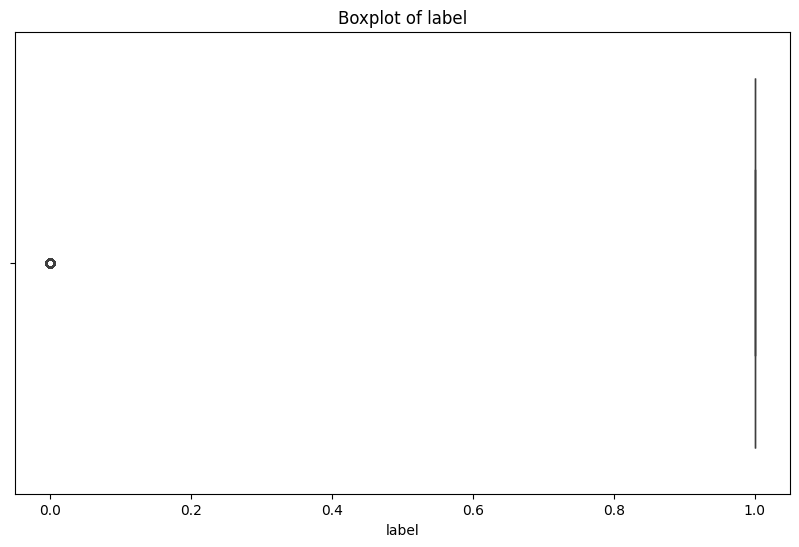

In [10]:
# plot outliers of numerical columns
numerical_columns = df1.select_dtypes(include=["int64", "float64"]).columns.tolist()

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

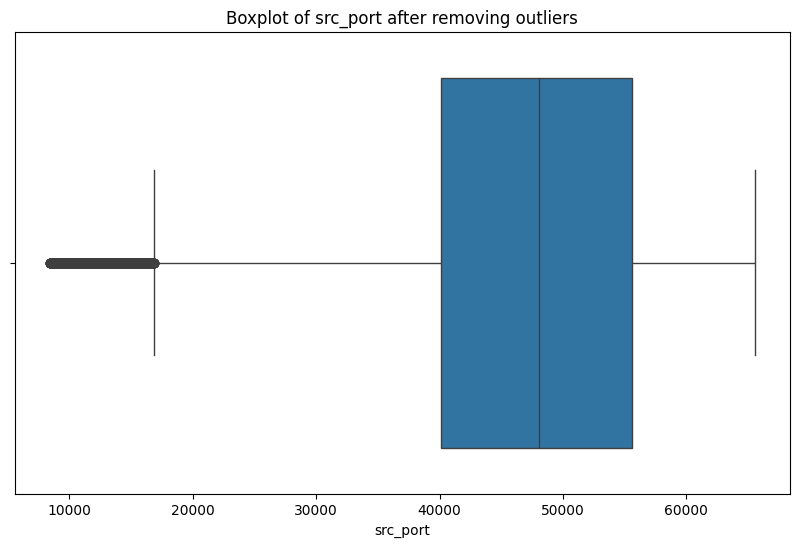

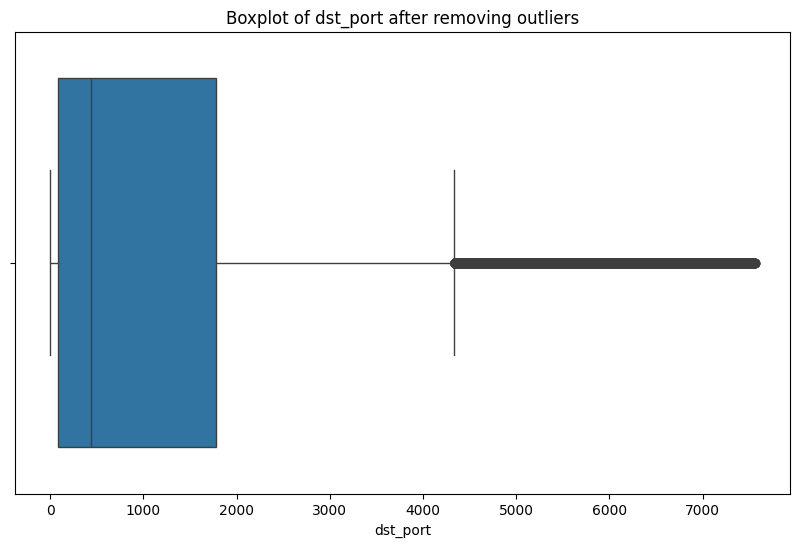

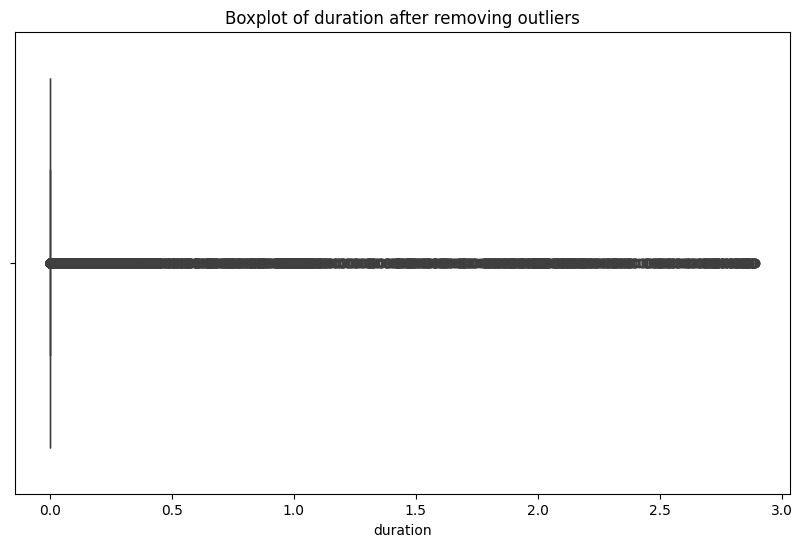

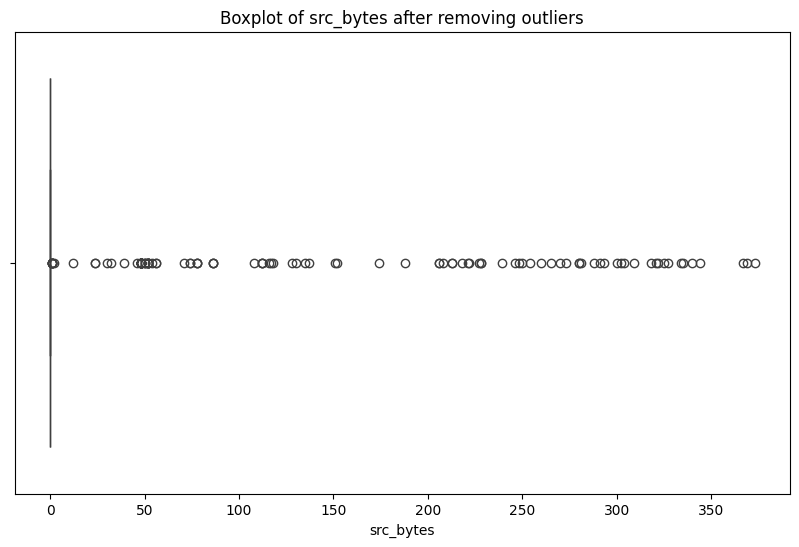

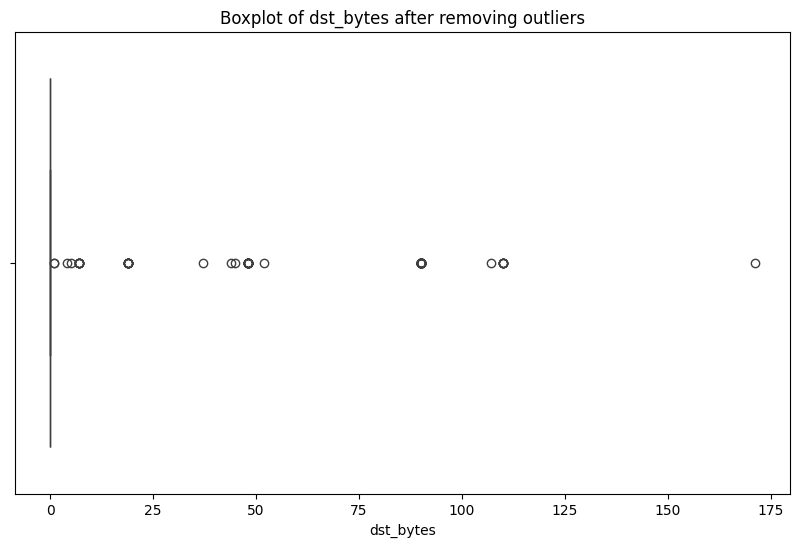

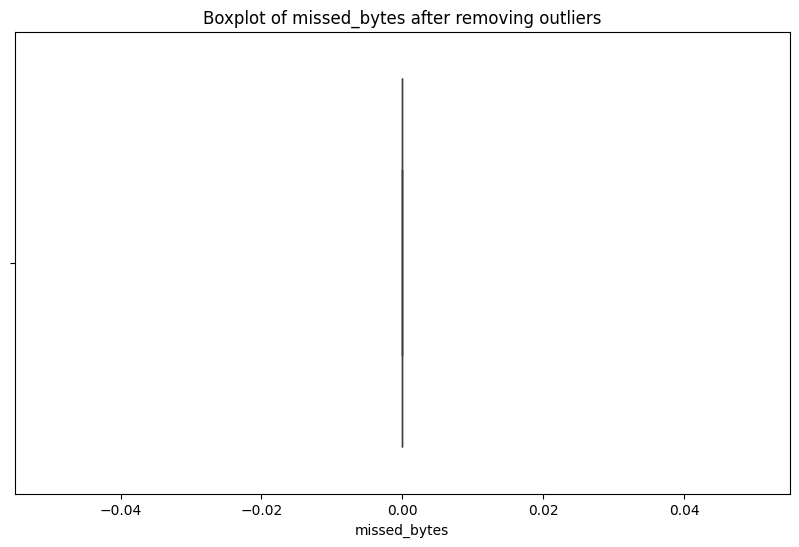

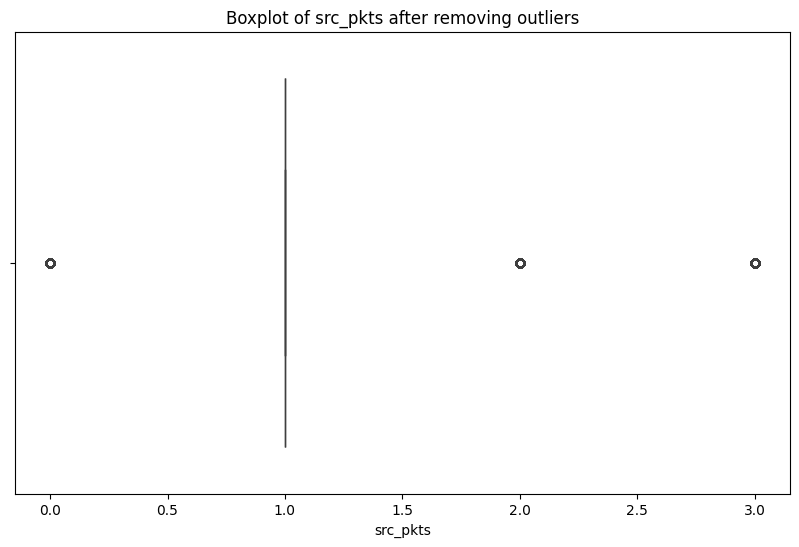

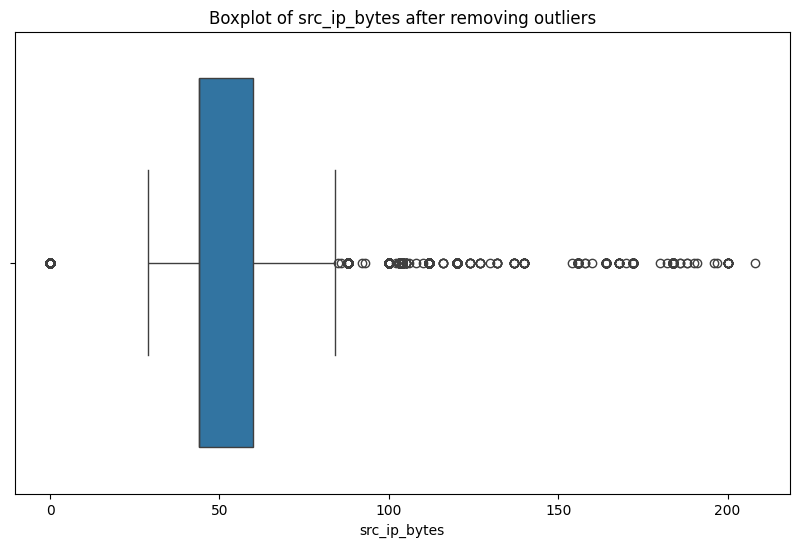

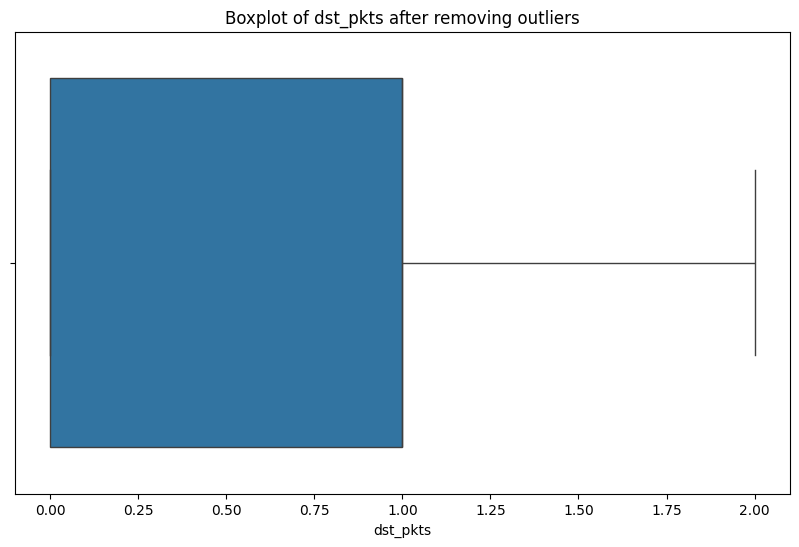

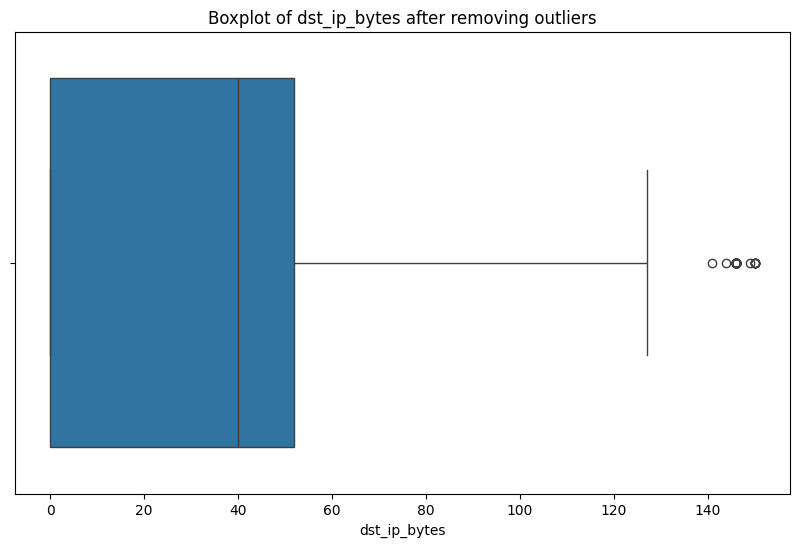

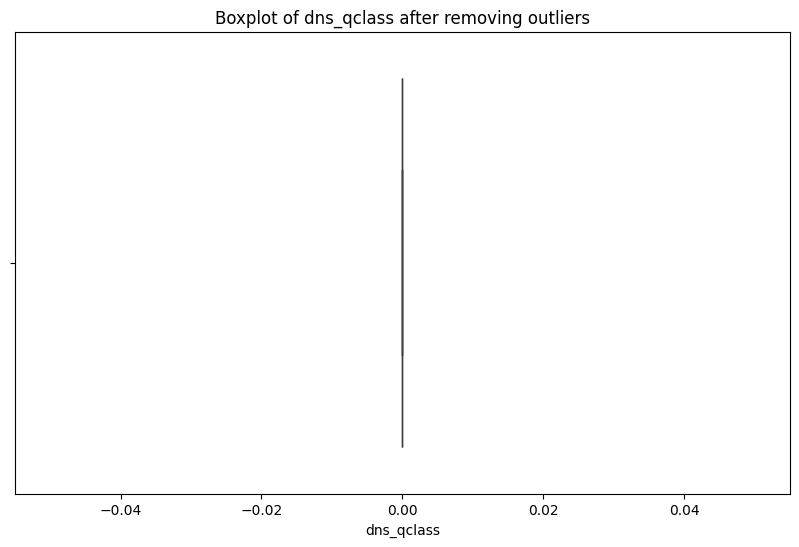

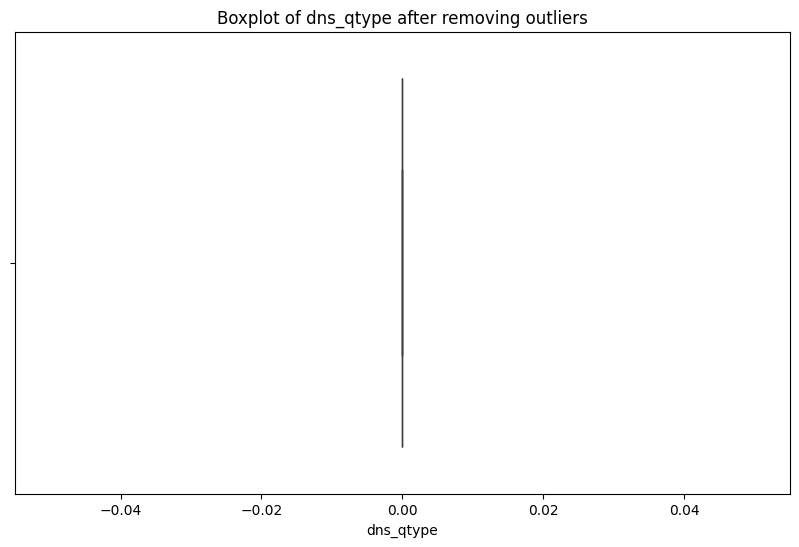

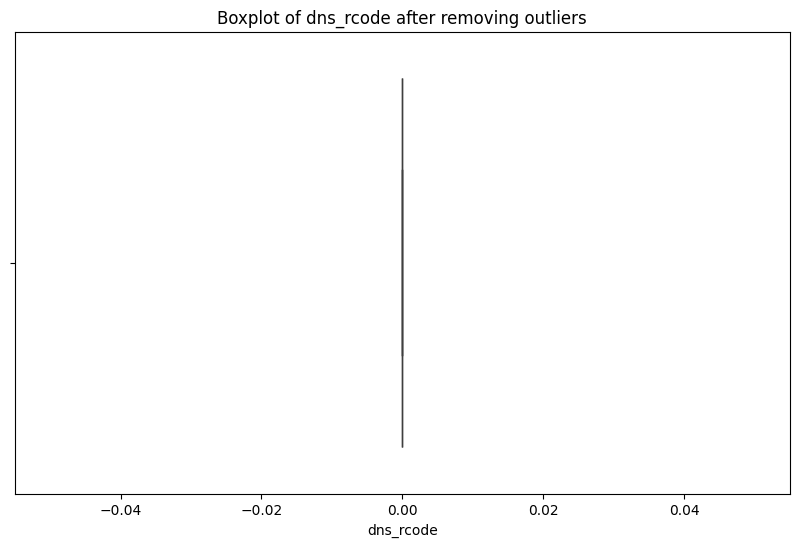

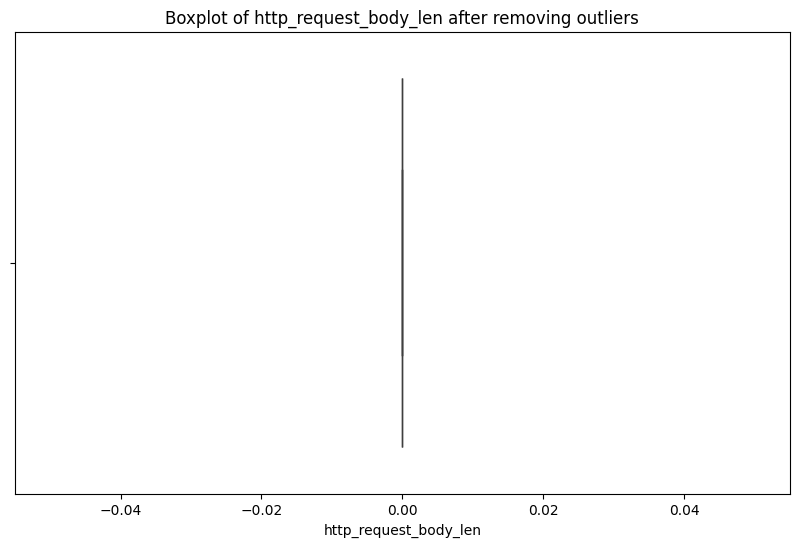

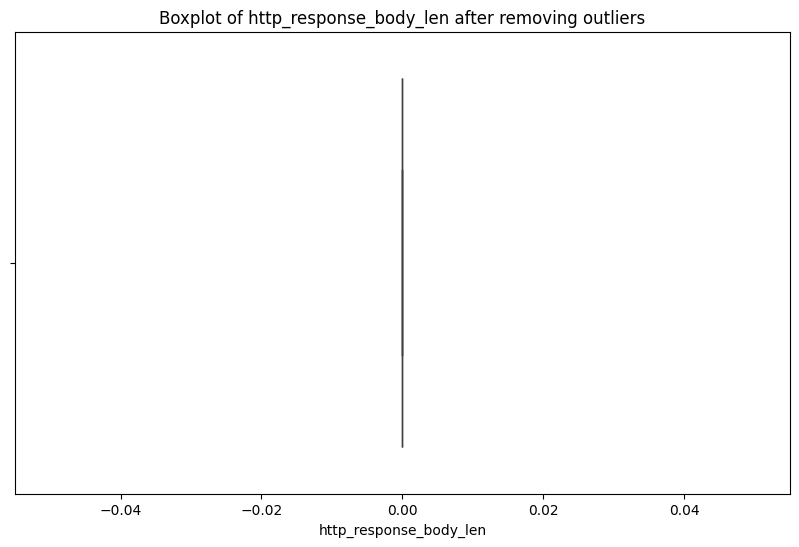

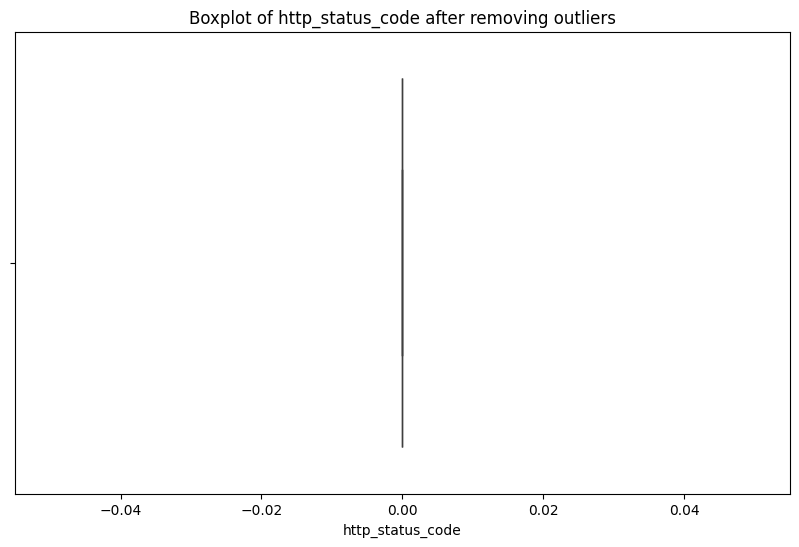

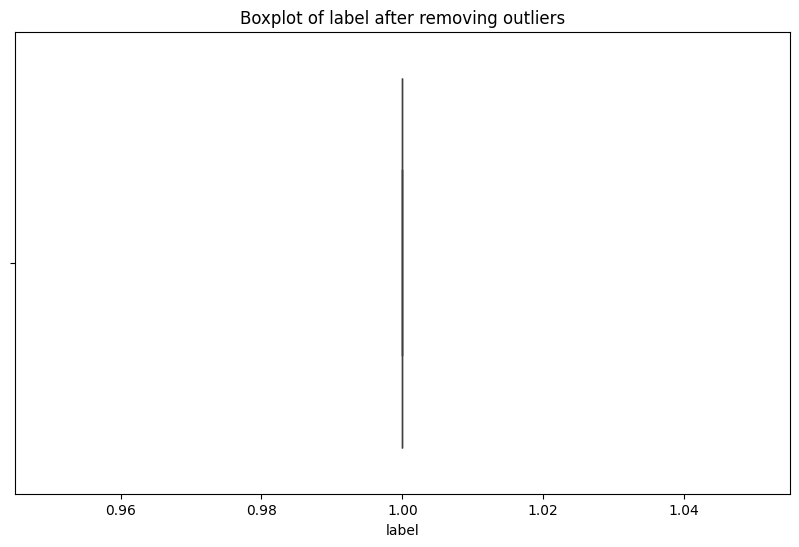

In [12]:
def remove_outliers(df, numerical_columns):
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df1_no_outliers = remove_outliers(df1, numerical_columns)
df1_no_outliers

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1_no_outliers[column])
    plt.title(f'Boxplot of {column} after removing outliers')
    plt.show()